In [4]:
import keras
keras.__version__

'2.10.0'

# Example of  a binary classification: classification of movie reviews

This is a classification that is divided into two groups (i.e. it is a binary classification). It represents the most common problem of machine learning. By analyzing this example, you will learn to classify movie reviews. You will be able to divide them into positive and negative reviews based on their content.

## The IMDB dataset


We'll be working with the IMDB set. It is a collection of 50,000 highly polarized reviews published on the Internet Movie Database. The reviews were divided into a training set (consisting of 25,000 reviews) and a test set (it consists of 25,000 reviews). Each of these collections is made up of half positive and half negative reviews.

Why do we use separate collections? In principle you should never test a machine learning model on the same data that was used to train it. Just because the model classifies the training data well does not mean that it will classify it with the same quality level. What we are really interested in is the performance of the model when classifying new data. We know the sample labels of the training dataset. It is obvious that we do not need them. We make predictions by using a model. The model might just remember the training dataset labels and be completely useless when predicting the labels for new reviews. This issue will be described in more detail in the next chapter.

The IMDB file, like the MNIST file, is included in the Keras package. This set has already been prepared for analysis: reviews (word sequences) have been converted into sequences of integer values. Each value symbolizes the presence of a selected word from the dictionary in the review.

The following code will load a dataset (when you run it for the first time, about 80MB of data will be downloaded to your computer's hard drive).



In [5]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


Num_words = 10000 - this value indicates that only the most common 10,000 words in the training dataset will be retained. Less frequent words will be omitted. This solution allows you to work with a data vector that has a processing size.

Train_data and test_data are review lists. Each review is a list of word indexes (as an encoded word sequence). Train_labels and test_labels contain labels in the form of 0s and 1s: 0 is a negative review and 1 is a positive review:


In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels[0]

1

We limit ourselves to the 10,000 most common words. As a result, we will have 10,000 word index values:

In [8]:
max([max(sequence) for sequence in train_data])

9999

Here's a quick way to decode one of the reviews and read it in English:

In [9]:
# The word_index dictionary assigns index values ​​to words.
word_index = imdb.get_word_index ()
# By inverting it, we can assign indexes to words.
reverse_word_index = dict ([(value, key) for (key, value) in word_index.items ()])
# Review the decoded code. Notice that the indexes are shifted by 3 because under the indexes for 0, 1, and 2
# there are indexes for "fill", "start of sequence" and "unknown word".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 1s 1us/step


In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Data preparation


An integer list cannot be passed directly to a neural network. You have to turn them into a list of tensors. This can be done in two ways:

• You can complete the lists so that they have the same length. Next you can convert them into an integer tensor that has a shape (samples or word_indices). The first layer of the neural network needs to use a layer that can process integer tensors (the Embedding layer - more information on the topic can be found in later chapters).

• You can encode lists to convert them into vectors of ones and zeros. This means that you can replace the sequence [3, 5] with a vector of 10,000 dimensions. It  will be filled with all zeros, and only under the indices numbered 3 and 5 there will be ones. In such a situation, the first layer of our network could be a Dense layer that can handle floating point data vectors.


Let's use the second solution and convert the data to vectors. For the sake of code clarity, we will do it manually.

In [12]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
# Creates a zero padded matrix of the shape (len (sequences), dimension).
     results = np.zeros((len (sequences), dimension))
     for i, sequence in enumerate (sequences):
         results [i, sequence] = 1. # Place the value 1 at the selected indexes.
     return results

# Training set in the form of a vector.
x_train = vectorize_sequences (train_data)
# Vector test set.
x_test = vectorize_sequences (test_data)

Now samples will look like this: 

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

We still have to perform the operation of converting sample labels to vectors:

In [14]:
# Converting labels to vectors.
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now the data can be processed by the neural network.

## Construction of a neural network


The inputs are vectors and the labels are scalar values ​​(ones and zeros). This is the simplest situation you can deal with. This type of problem is best solved with a simple fully connected layer (Dense) stack network with relu activations: the Dense layer (16, activation = 'relu').

The argument passed to each Dense layer (16) is the number of hidden units of the layer. Hidden unit is a dimension of the layer representation space. In Chapter 2, we wrote about how each Dense layer with relu activation implements the following chain of tensor operations:

output = relu (dot (W, input) + b)

With 16 hidden units, the weight matrix W will have a shape (input_dimension, 16): the dot product of the matrix W will project the input data into a 16-dimensional representation space (then the b threshold vector is added and the relu operation is performed). The dimensions of the data representation space can be understood as "the degree of freedom that the network has in learning internal data representations". Increasing the number of hidden units (increasing the number of representation for space dimensions) allows the network to learn more complex representations. The operation of such a network will require more computing power and may lead to the training of unwanted parameters. These are regularities that will improve the processing efficiency of the training dataset but at the same time they are useless when processing test data.
When working with Dense layers, you need to answer two questions about the network architecture:

• How many layers should be used?

• How many hidden units do you need to select in each layer?


In the next chapter, we will present the formal rules for answering these questions. For now, let's make the following assumptions:

• two intermediate layers - each containing 16 hidden units,

• the third layer generating the prediction of the emotional mood of the analyzed review in the form of a scalar value.

The mid-tiers will use the relu activation function and the last tier will use the sigmoid activation function. It will generate a value between 0 and 1 indicating the probability that the review is positive. The relu function (a straightened linear unit) is a function to reset negative values ​​(see Figure 3.4), and the sigmoid function "stuffs" the values ​​into the range between 0 to 1 (see the Figure 3.5), which allows the network to generate values ​​that can be interpreted as a probability.

The schema of our network:

![3-layer network](img\3_4.png)

Here is the network implementation code using the Keras package (it is similar to the network implementation from the MNIST processing example as shown earlier).

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Finally, we need to select the loss function and the optimizer. We are working on a binary classification problem and the network returns probability values ​​(at the end of the network there is a layer of one unit with the sigmoid activation function). It is best to use the binary_crossentropy loss function. This is not the only option that we can incorporate. We can also include the mean squared error function mean_squared_error. However, the cross entropy is usually the best option for models that return probability values. The term cross entropy is derived from the information theory. It is a measure of the distance between the probability distributions. In this case this is the distribution of true values ​​and the distribution of predicted values.

Below you will find the code setting up the model. In it we select the rmsprop optimizer and the loss function binary_crossentropy. Note that we will also monitor accuracy while training.


In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

The metric, optimizer, and loss function are defined using strings. This is possible because rmsprop, binary_crossentropy and accuracy are packages that are part of the Keras library. Sometimes it is necessary to configure optimizer parameters or to pass a self-executed loss function or a metric function. This can be done by passing an instance of the optimizer class as the optimizer argument (see the Listing 3.5) and passing the object function as loss and metrics arguments (see the next block of code).

In [17]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

c:\Users\merli\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Model validation

To monitor the accuracy of the model during training, we will create a dataset that has not been used to train the model. We will do this by detaching 10,000 samples from the training dataset.

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In this case we will train the model for 20 epochs (we will perform 20 iterations of all samples located in x_train and y_train tensors) that is divided into batches of 512 samples. At the same time, we will monitor the loss and accuracy functions of the model while processing the 10,000 samples we have just set aside. For this purpose, we need to pass the validation (control) set as the validation_data argument:

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 134ms/step - loss: 0.5330 - binary_accuracy: 0.7861 - val_loss: 0.4018 - val_binary_accuracy: 0.8696
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3247 - binary_accuracy: 0.8997 - val_loss: 0.3230 - val_binary_accuracy: 0.8773
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2348 - binary_accuracy: 0.9257 - val_loss: 0.2896 - val_binary_accuracy: 0.8847
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1867 - binary_accuracy: 0.9383 - val_loss: 0.2889 - val_binary_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1503 - binary_accuracy: 0.9527 - val_loss: 0.2767 - val_binary_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1249 - binary_accuracy: 0.9613 - val_loss: 0.2881 - val_binary_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - lo

When training on the CPU, one process epoch takes less than 2 seconds to process. The entire process takes about 20 seconds. At the end of each epoch, the algorithm pauses for a moment as the model calculates the loss and accuracy using 10,000 samples of the validation dataset.

Note that by calling model.fit() we return a History object. This object has an item called history, which is a dictionary item of training data. Let's take a look at it in more detail: When training on the CPU, one process epoch takes less than 2 seconds to process. The entire process takes about 20 seconds. At the end of each epoch, the algorithm pauses for a moment as the model calculates the loss and accuracy using 10,000 samples of the validation dataset.

Remember, that we called model.fit() that returned a History object. This object had an item called history, which was a dictionary of training data. Let's now take a look at it:



In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

The dictionary contains four items: one for each of the metrics monitored during training and validation. Let's create a graph comparing training and validation loss. The second graph we will create changes training accuracy and validation. Your results may be slightly different due to the random network initialization.

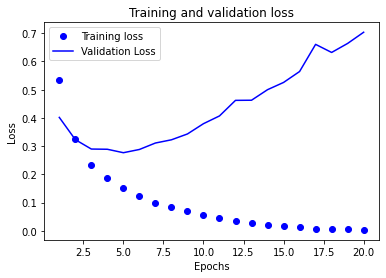

In [23]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# The bo parameter defines the dashed line in the form of blue dots.
plt.plot (epochs, loss, 'bo', label = 'Training loss')
# The b parameter defines a solid blue line.
plt.plot (epochs, val_loss, 'b', label = 'Validation Loss')
plt.title ('Training and validation loss')
plt.xlabel ('Epochs')
plt.ylabel ('Loss')
plt.legend()

plt.show()

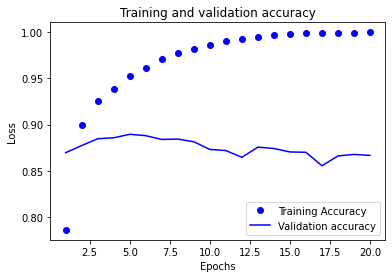

In [24]:
plt.clf()   # The cleaning draw.
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot (epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot (epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title ('Training and validation accuracy')
plt.xlabel ('Epochs')
plt.ylabel ('Loss')
plt.legend ()

plt.show()

As you can see, the training loss decreases with each epoch while the accuracy of training increases. This is what we expect from the optimization with the gradient descent algorithm. The value that we are trying to minimize should decrease with each subsequent iteration. In the fourth epoch the validation loss and validation accuracy increase. This is an example of a situation we took notice of  earlier. A model that works better on a training dataset does not have to work better when processing new data. In practice, this is an example of overfitting - after the second epoch, the model is too optimized on the training dataset and learns a specific representation of the training dataset. It does not take into account the overall vision that works well beyond the training dataset.

In this case, we can prevent overfitting by breaking the algorithm after 3 epochs. We can use many techniques to prevent overfitting of the model. We will focus on them in the next chapter.

Now we can train the new network from scratch (let's do it over four epochs) and then evaluate it against a test dataset.


In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 17ms/step - loss: 0.4468 - accuracy: 0.8148
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2563 - accuracy: 0.9114
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1988 - accuracy: 0.9287
Epoch 4/4
782/782 [==============================] - 6s 7ms/step - loss: 0.3822 - accuracy: 0.8534


In [26]:
results

[0.38218024373054504, 0.8533599972724915]

[link text](https://) This naive solution helps obtain an accuracy of 88%. Refined models should approach 95% accuracy.

## Using a trained network to generate predictions about new data

Once the net is trained, we can use it to do something practical. To generate a value that determines the probability that a review is positive we can  use the predict method:

In [27]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.09140945],
       [0.99919325],
       [0.2858565 ],
       ...,
       [0.04580709],
       [0.03081057],
       [0.31643167]], dtype=float32)

For new samples, the network is very confident in its verdict (it produces values ​​close to 0.99 or 0.01). For others it produces much less reliable results, such as 0.6 or 0.4.


## Further experiments

Here are the experiments that will help you confirm that we have chosen a  reasonable architecture (they can also be improved):

* We used two hidden layers. Try adding one or three hidden layers and see how this affects the accuracy of the validation and the testing.
* Try to use layers with more or less hidden units: try layers with e.g. 32 and 64 units.
* Use the loss mse function instead of the loss function binary_crossentropy.
* Try the tanh activation function (this function was popular at the beginning of the development of neural networks). Replace the relu function with it.

## Conclusions


Here are the conclusions that can be drawn from this example:

* Usually, data requires pre-treatment. After that operation, it can be routed in the form of tensors to the input of a neural network. The word sequence can be represented as vectors of binary values, but there are other ways to go about it.
* Dense layer stacks with relu activation can be used to solve a variety of problems (including the tone classification). Consequently, you will most likely use them frequently in the future.
* For the binary classification problem (two output classes) there should be a Dense layer with one unit and sigmoid activation function at the end of the network. The output values ​​generated by the network should be scalars in the range of 0 to 1 (it should be a probability).
* In this configuration of the network output layer, the loss function should be the binary_crossentropy.
* The rmsprop optimizer is generally a good choice for any problem. Consequently, you have one less thing to analyze.
* Neural networks, as they learn more about the training data, start to over-adjust. This leads to a deterioration of the results of new data processing. You must constantly monitor network performance while processing data that is not part of the training set.
